In [26]:
#DESCRIPTION
#Comcast is an American global telecommunication company. The firm has been providing terrible customer service.
#They continue to fall short despite repeated promises to improve.
#Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
#The existing database will serve as a repository of public customer complaints filed against Comcast.
#It will help to pin down what is wrong with Comcast's customer service.


#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [143]:
#Import data into Python environment.
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")
#to see the first five data
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [144]:
#check if there are any missing values
Nan_values = comcast.isna()
Nan_values.count() 

Ticket #                       2224
Customer Complaint             2224
Date                           2224
Date_month_year                2224
Time                           2224
Received Via                   2224
City                           2224
State                          2224
Zip code                       2224
Status                         2224
Filing on Behalf of Someone    2224
dtype: int64

In [18]:
comcast.shape #There are no missing value

(2224, 11)

In [145]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.


#convert and get the month and day
comcast['Date_month_year'] = pd.to_datetime(comcast['Date_month_year'])
comcast['Month']= comcast['Date_month_year'].apply(lambda x: x.month)
comcast['Day'] = comcast['Date_month_year'].apply(lambda x: x.day)
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


Text(0.9, 0.9, 'Max complaints in Month (6)')

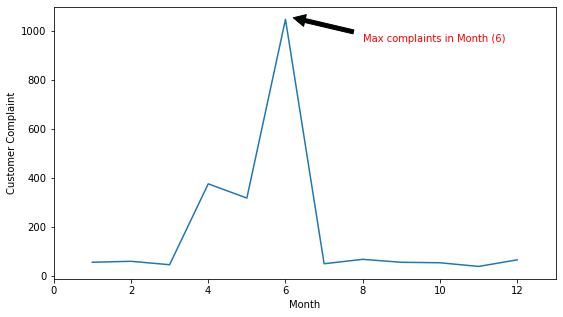

In [146]:
#Monthly graph

plt.figure(figsize=(9,5))
monthly = comcast.groupby('Month').count().reset_index() #get the data

lp = sns.lineplot(x='Month', y= 'Customer Complaint', data = monthly, sort=False, markers = "o")
aix = lp.axes
aix.set_xlim(0,13) #the limt / range for x-axsis 
aix.annotate('Max complaints in Month (6)', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.9, 0.90), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')


(0.0, 32.0)

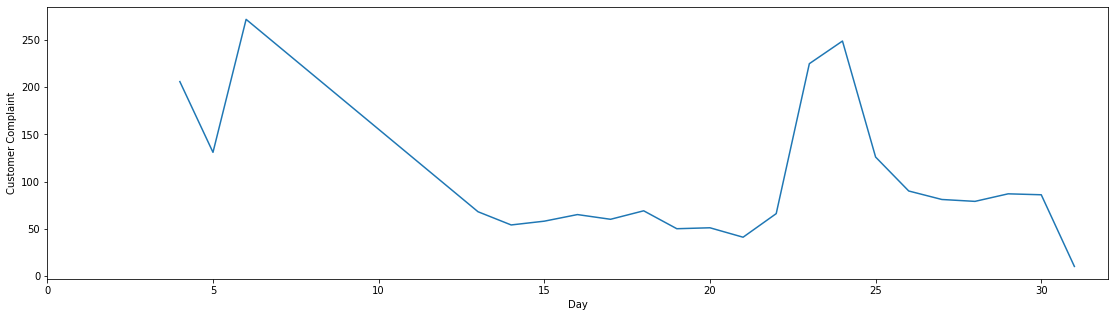

In [37]:
#Daily graph

plt.figure(figsize=(19,5))
daily = comcast.groupby('Day').count().reset_index() #get the data

lp = sns.lineplot(x='Day', y= 'Customer Complaint', data = daily, sort=False, markers = "o")
aix = lp.axes
aix.set_xlim(0,32) #the limt / range for x-axsis 


In [262]:
#Provide a table with the frequency of complaint types.
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

#Get the types
service= comcast[comcast['Customer Complaint'].str.contains('service', case = False)]   
scount= service['Ticket #'].count()

internet= comcast[comcast['Customer Complaint'].str.contains('internet', case = False)]   
icount= internet['Ticket #'].count()

network= comcast[comcast['Customer Complaint'].str.contains('network', case = False)]   
ncount= network['Ticket #'].count()

billing= comcast[comcast['Customer Complaint'].str.contains('billing', case = False)]   
bcount= billing['Ticket #'].count()

charges= comcast[comcast['Customer Complaint'].str.contains('charges', case = False)]   
ccount=charges['Ticket #'].count()

email= comcast[comcast['Customer Complaint'].str.contains('email', case = False)]   
ecount= email['Ticket #'].count()

#If it is none of them it will categoize as "Others"
summ= scount+icount+ncount+bcount+ccount+ecount
cothers= comcast['Customer Complaint'].count()-summ

#Create the table
ctype= pd.DataFrame({'Service':[scount], 'Internet':[icount], 'Network':[ncount], 'Billing':[bcount],
                     'Charges':[ccount], 'Email':[ecount], 'Others':[cothers]})
ctype

,Service,Internet,Network,Billing,Charges,Email,Others
0,489,532,2,298,77,16,810


In [182]:
#Create a new categorical variable with value as Open and Closed.
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

#New column with the complaint Status.
comcast["Complaint_Status"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast["Status"]]

In [240]:
comcast.head(7)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Complaint_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,6,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,24,Open


In [187]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
#Which state has the maximum complaints
#Which state has the highest percentage of unresolved complaints

#get the data
Status = comcast.groupby(["State","Complaint_Status"]).size().unstack().fillna(0)
Status

Complaint_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

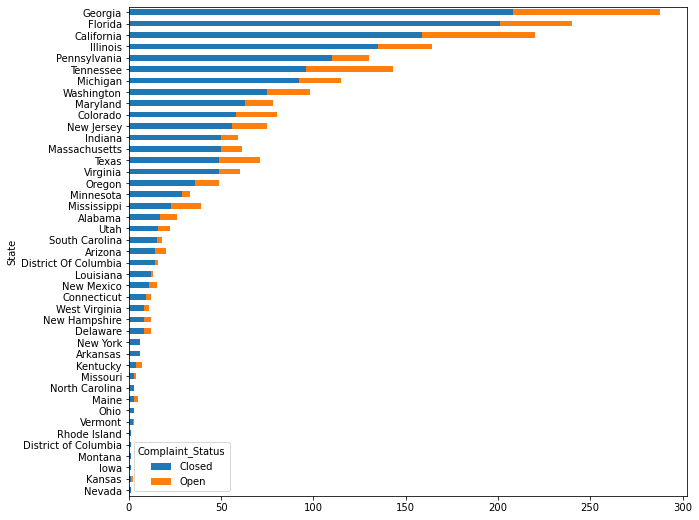

In [202]:
#Stacked Bar chart
Status.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,9), stacked=True)


In [205]:
#state that has the maximum complaints

comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:3]
#Georgia has highest complaints

,Complaint count
State,
Georgia,288
Florida,240
California,220


In [216]:
#state that has the highest percentage of unresolved complaints

un_complaints = comcast.groupby(["State","Complaint_Status"]).size().unstack().fillna(0)
un_complaints['Unresolved_cmp_prct'] = un_complaints['Open']/un_complaints['Open'].sum()*100
un_complaints.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:3]
#Georgia state has highest Unresolved complaints 

Complaint_Status,Closed,Open,Unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909


In [219]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.


#GET the percentage of Received Via with Complaints Status
compl_pre = comcast.groupby(['Received Via','Complaint_Status']).size().unstack().fillna(0)
compl_pre['resolved'] = compl_pre['Closed']/compl_pre['Closed'].sum()*100
compl_pre['resolved ']


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

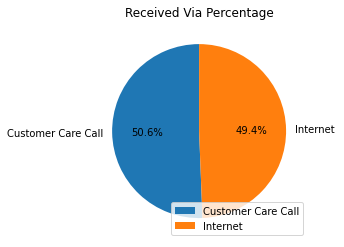

In [263]:
#Pie Chart
lbl= 'Customer Care Call', 'Internet ' 
plt.pie(compl_pre['resolved'], labels=lbl,startangle=90 ,autopct='%1.1f%%')
plt.title('Received Via Percentage')
plt.legend(loc="lower right")
